<a href="https://colab.research.google.com/github/juliatauane/machine_learning/blob/main/abalone_dataset_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abalone Data Set**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

df = pd.read_csv(
    filepath_or_buffer='http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
    header=None,
    sep=',')
df.head()
# X = df.iloc[:,1:9].values
# X


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


558.5067614703565
397.0687179441694
134.24413965751933
523.1145665966924
394.500577699089
308.8436839155677
269.4934595571007
3.779927899607151
112.77134891670008
2.6961623370795165
7.580735021352264
5.358394838936076
7.966939535043043
59.11684316429405
12.263301210384617
82.46657879689967
15.368773465114575
20.626817249192744
14.175853533014907
16.66221821514435
4.792806273305066
46.552770169821486
28.706283793727845


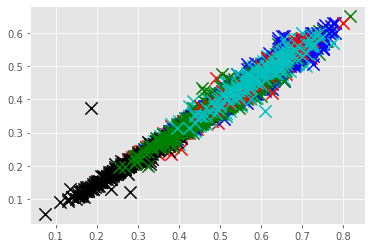

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

df = pd.read_csv(
    filepath_or_buffer='http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
    header=None,
    sep=',')
# df.columns=[0, 1, 2, 3, 4]
# df.dropna(how="all", inplace=True)

X = df.iloc[:,1:9].values
#y = df.iloc[:,4].values

class K_Means:
    def __init__(self, k=8, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

colors = 10*["g","r","c","b","k"]

model = K_Means()
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()
